In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
def load_data(filename='train.csv'):
    path = os.path.join('data', filename)
    df = pd.read_csv(path)
    return df

In [3]:
train = load_data()
train.drop(columns=['PassengerId'], inplace=True)
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [5]:
train.drop('Cabin', axis=1, inplace=True)

In [33]:
def plot_survival(data, column, **kwargs):
    survive_0 = train.loc[train['Survived'] == 0]
    survive_1 = train.loc[train['Survived'] == 1]
    plt.hist([survive_0[column].loc[survive_0[column].notnull()], 
              survive_1[column].loc[survive_1[column].notnull()]], 
             label=['Didn\'t survive', 'Survived'], **kwargs)
    plt.xlabel(column)
    plt.legend(loc='best')
    plt.show()

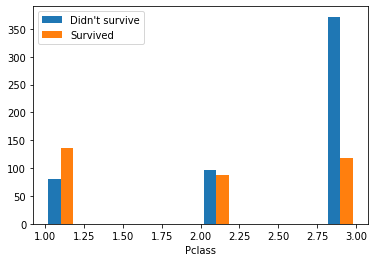

In [32]:
plot_survival(train, 'Pclass')

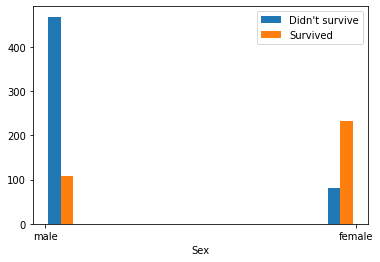

In [8]:
plot_survival(train, 'Sex')

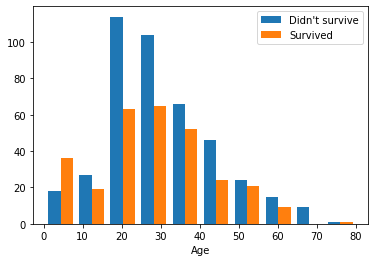

In [9]:
plot_survival(train, 'Age')

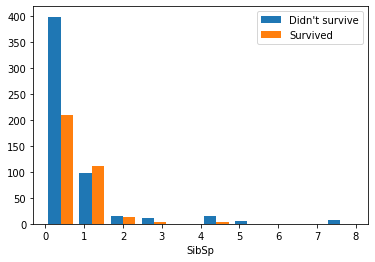

In [10]:
plot_survival(train, 'SibSp')

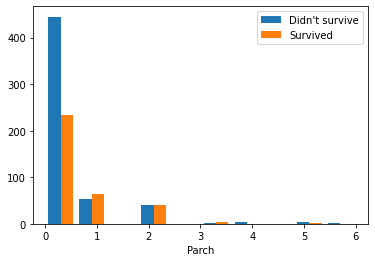

In [11]:
plot_survival(train, 'Parch')

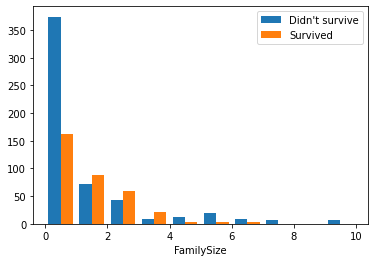

In [15]:
train['FamilySize'] = train['SibSp'] + train['Parch']
plot_survival(train, 'FamilySize')

<AxesSubplot:title={'center':'Fare'}, xlabel='Survived'>

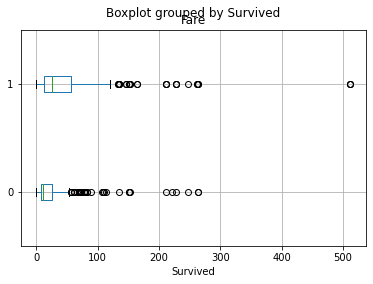

In [18]:
train.boxplot(by='Survived', column=['Fare'], vert=False)

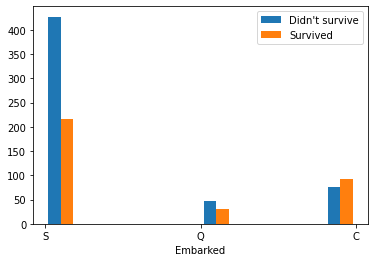

In [35]:
plot_survival(train, 'Embarked')

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


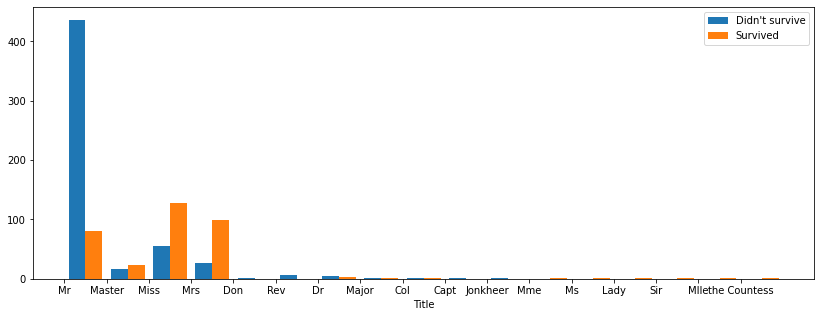

In [41]:
def extract_title(name):
    return name[name.find(',') + 2: name.find('.')]

train['Title'] = train['Name'].apply(extract_title)
print(train['Title'].unique())
plt.figure(figsize=(14,5))
plot_survival(train, 'Title', bins=range(len(train['Title'].unique()) + 1))